# Computer Vision Business Recommendations
#### Luis Estrada, Michael Eugene, Maddie Hince, Kilmar Lazo, Cat Murad, and Elijah Soba

## Overview

Computer Vision wants to break into the movie production industry, but needs insight regarding what types of movies to make. 

We have recommended three courses of action that will allow Computer Vision's films to be successful at the box office:
- Produce a movie in the animation genre (with a the possibility of a comedy sub-genre)
- Allocate $80 million towards movie production. 
- Allocate more marketing effort towards international audiences (rather than domestic audiences).

We based these recommendations off of three high-priority metrics:
- Highest-rated movie genres
- Budget-to-box office ratio
- Which production studios gross the highest
    - Which genres of movies these production studios produce

## Business Understanding

- Computer Vision wants to establish a movie studio to create video and movie content.
- Computer Vision is new to the movie / video market and needs guidance regarding what types of movies to create. 
- Providing insights into what types of movies are doing best at the box office will allow Computer Vision to allocate their budget towards creating a successful film. 

## Data Understanding

In [1]:
# Import all necessary libraries
import sqlite3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

# Ignore warnings from library functions
warnings.filterwarnings('ignore')

# Set the style for plots 
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set()

We used data from three main sources to make recommendations for Computer Vision: 
- Box Office Mojo
- The Numbers
- IMDB (Internet Movie Database)

### Understanding Box Office Mojo

In [2]:
# Define filepath & read in the data 
filepath = 'zippedData/bom.movie_gross.csv.gz'
movie_gross_df = pd.read_csv(filepath)

In [3]:
# Take a preliminary look at the data 
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Take a look at the data frame information
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From looking at the information we can see immediately that there are a couple things wrong with the data:
- There are missing values in studio, domestic gross, and foreign gross
- Foreign gross is represented as an object instead of a float
- Year is represented as an integer, but it is probably better to have it as a datetime object

In [5]:
# Lets see what percentage of the studio data is missing 
pct_missing_std = movie_gross_df.studio.isna().sum()/len(movie_gross_df.title)
print(f'Missing studio data represents {pct_missing_std*100}% of the data')

Missing studio data represents 0.14762326542663123% of the data


In [6]:
# Lets see what percentage of the domestic gross data is missing 
pct_missing_dom = movie_gross_df.domestic_gross.isna().sum()/len(movie_gross_df.title)
print(f'Missing domestic gross data represents {pct_missing_dom*100}% of the data')

Missing domestic gross data represents 0.8266902863891349% of the data


In [7]:
# Lets see what percentage of the foreign gross data is missing 
pct_missing_for = movie_gross_df.foreign_gross.isna().sum()/len(movie_gross_df.title)
print(f'Missing foreign gross data represents {pct_missing_for*100}% of the data')

Missing foreign gross data represents 39.85828166519043% of the data


### Understanding The Numbers

In [8]:
# Define filepath & read in the data 
filepath = 'zippedData/tn.movie_budgets.csv.gz'
budget_df = pd.read_csv(filepath)

In [9]:
# Take a preliminary look at the data
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
# Take a look at the data frame information
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From looking at the information, we can see a few important things
- There are no missing (NaN) values
- All of the numerical columns are strings instead of floats

In [11]:
# Lets see if there are any 0 values, which would be considered missing 
either_miss = len(budget_df[(budget_df['domestic_gross'] == '$0') | (budget_df['worldwide_gross'] == '$0')])
both_miss = len(budget_df[(budget_df['domestic_gross'] == '$0') & (budget_df['worldwide_gross'] == '$0')])
just_dom = len(budget_df[budget_df['domestic_gross'] == '$0'])
just_world = len(budget_df[budget_df['worldwide_gross'] == '$0'])
len_dataset = len(budget_df['domestic_gross'])
print(f'Number of missing gross values from either column {either_miss}')
print(f'Number of missing gross values from both columns {both_miss}')
print(f'Number of missing gross values from just domestic {just_dom}')
print(f'Number of missing gross values from just worldwide {just_world}')
print(f'Number of items in the entire dataset {len_dataset}')

Number of missing gross values from either column 548
Number of missing gross values from both columns 367
Number of missing gross values from just domestic 548
Number of missing gross values from just worldwide 367
Number of items in the entire dataset 5782


In [12]:
# Because there are numbers with 0 domestic and worldwide gross, lets see what fraction of the dataset it is
pct_0_dom = just_dom/len_dataset
print(f'Percentage of the data that is missing from the domestic gross column {pct_0_dom*100}')
pct_0_world = just_world/len_dataset
print(f'Percentage of the data that is missing from the worldwide gross column{pct_0_world*100}')

Percentage of the data that is missing from the domestic gross column 9.47768938083708
Percentage of the data that is missing from the worldwide gross column6.347284676582497


### Understanding IMDB

In [13]:
# Establish a connection with SQL databasae and read in the data
filename = 'zippedData/im.db'
conn = sqlite3.connect(filename)
q = """SELECT *
       FROM movie_ratings
       JOIN movie_basics USING(movie_id)
       WHERE movie_basics.start_year >= 2010"""
ratings_df = pd.read_sql(q, conn)

In [14]:
# Take a preliminary look at the data
ratings_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,6.1,13,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,6.5,119,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
# Take a look at the data frame information
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


From looking at the information, we can see that there are some missing values in the runtime column and data types for columns are as expected

### Summary 
The data from Box Office Mojo included movie domestic and foreign gross, and movie production studio.
- Dataset contained in a .csv file
- Approximately 39% missing data in foreign gross column

Data from The Numbers included production budget and worldwide gross information.
- Dataset contained in a .csv file
- Approximately 6% missing data in worldwide gross

Data from IMDB included general movie information such as title, average ratings, and genres.
- Data represented as a relational SQL database
- Most analysis done using __movie_basics__ and __movie_ratings__ tables

We only considered movies in each dataset that had been released in 2010 or later.

## Data Preparation

### Preparing the Box Office Mojo Dataset

In [ ]:
# Lets recast foregin_gross as a float 
str_to_float = lambda x: float(str(x).replace(',', ''))
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].map(str_to_float)

In [ ]:
# Lets test to see if the data type actually changed 
assert movie_gross_df['foreign_gross'].dtype  == np.float64

In [ ]:
# Lets replace missing studios with 'IND' representing independent
movie_gross_df['studio'] = movie_gross_df['studio'].fillna('IND')

In [ ]:
# Test to see if there are any missing values in the studio column
assert movie_gross_df['studio'].isna().sum() == 0

In [ ]:
# The missing % of data for domestic gross is small, so lets delete those rows
movie_gross_df = movie_gross_df.dropna(axis=0, subset=['domestic_gross'])

Because the amount of missing data from the foreign gross column is too much, we must impute the missing values. We impute missing values by calculating the median % change between foreign and domestic gross and using that to give an estimate of foreign gross as a function of domestic

In [ ]:
# That is too much, so lets find the median pct change between domestic and foreign films
med_pct_change = ((movie_gross_df['foreign_gross'] - movie_gross_df['domestic_gross'])/movie_gross_df['domestic_gross']).median()
print(med_pct_change)

0.6315266036797613


In [ ]:
# Now that we have the median % change, lets impute the missing foreign values 
impute_change = movie_gross_df['domestic_gross'] + (movie_gross_df['domestic_gross'] * med_pct_change)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(impute_change)

In [ ]:
# Test that we now have no more NaN values in the data 
assert movie_gross_df['foreign_gross'].isna().sum() == 0

In [ ]:
# Finally, test to see if there are any missing values anywhere in the data 
assert movie_gross_df.isna().sum().sum() == 0

In [ ]:
# Lets normalize the data to millions to make numbers more manageable
movie_gross_df['total_gross'] = movie_gross_df['total_gross']/1000000
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross']/1000000
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross']/1000000

In [ ]:
# Lets change the title to avoid any issues with spacing
movie_gross_df['title'] = movie_gross_df['title'].map(lambda x: x.strip().lower().replace(" ", ""))

### Preparing the Numbers Dataset

In [ ]:
# Lets define a function that will parse through a string of $xxx,xxx,xxx and turn it into a float
money_to_float = lambda x: float(x.replace('$','').replace(',',''))

In [ ]:
# Lets test to make sure this function is behaving the way that we anticipate
assert money_to_float('$1,000') == 1000

In [ ]:
# Update the dtype of the production_budget column 
budget_df['production_budget'] = budget_df['production_budget'].map(money_to_float)

In [ ]:
# Update the dtype of the domestic_gross column 
budget_df['domestic_gross'] = budget_df['domestic_gross'].map(money_to_float)

In [ ]:
# Update the dtype of the worldwide_gross column 
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].map(money_to_float)

In [ ]:
# Test to make sure it worked
assert budget_df['production_budget'].dtype == np.float64

In [ ]:
# Lets make the release date an int dtype that only has the year
budget_df['release_date'] = pd.to_datetime(budget_df['release_date']).dt.year

In [ ]:
# Test to make sure the dtype is now correct
assert budget_df['release_date'].dtype == np.int64

In [ ]:
# < 10% of data is $0, so lets drop those records
budget_df = budget_df[budget_df['domestic_gross'] != 0]

In [ ]:
# Test to make sure we dropped correctly
assert len(budget_df[budget_df['domestic_gross'] == 0]) == 0
assert len(budget_df[budget_df['worldwide_gross'] == 0]) == 0

In [ ]:
# Finally, we can normalize monetary columns to the millions 
budget_df['production_budget'] = budget_df['production_budget']/1000000
budget_df['domestic_gross'] = budget_df['domestic_gross']/1000000
budget_df['worldwide_gross'] = budget_df['worldwide_gross']/1000000

### Preparing the IMDB Dataset

In [ ]:
# For the sake of our analysis, we can drop unnecessary columns 
to_drop = ['movie_id', 'original_title', 'start_year', 'runtime_minutes']
ratings_df = rateings_df.drop(labels=to_drop, axis=1)

In [ ]:
# Lets change the titles to avoid any conflicts with spacings
rate_genre_df['primary_title'] = rate_genre_df['primary_title'].map(lambda x: x.strip().lower().replace(" ", ""))

In [ ]:
# Lets filter out any movies that have a bottom 25% number of votes 
ratings_df = ratings_df[ratings_df['numvotes'] >= 62]

## Data Analysis & Visualizations
(After every visualization that corresponds to our recommendation, mention in **bold** the recommendation that we make)

### Box Office Mojo Analysis

### The Numbers Analysis

### IMDB Analysis 
(Include IMDB combined with Box Office Mojo data analysis here too)

In [ ]:
# removing rows with any null values
ratings_df.dropna(how='any', axis=0, inplace=True)

In [17]:
# creating a function to format genres
def clean_genres(genres):
    '''
    Takes a list of genres and builds a string from the list
    for easier aggregation and comparison. 
    -
    Input:
    genres : list of genres to be converted
    -
    Output:
    lowercase, comma-separated string built from list 
    '''
    genres = str(genres)
    genres_list = sorted(genres.lower().split(','))
    return ','.join(list(map(str, genres_list)))

In [18]:
# apply clean_genres function to ratings dataset
ratings_df['genres'] = ratings_df['genres'].apply(clean_genres)
ratings_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77,Sunghursh,Sunghursh,2013,175.0,"action,crime,drama"
1,tt0066787,7.2,43,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"biography,drama"
2,tt0069049,6.9,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,drama
3,tt0069204,6.1,13,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"comedy,drama"
4,tt0100275,6.5,119,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"comedy,drama,fantasy"


### Highest-Rated Genres

In [20]:
# grouping ratings dataset by genre
ratings_df['genres'].value_counts()
sorted_by_avg = ratings_df.groupby('genres').mean().sort_values(by='averagerating', ascending=False)

In [21]:
# filter out movie genres with less than 62 total votes
sorted_avg_higher_votes = sorted_by_avg[sorted_by_avg['numvotes'] >= 62].head(15)
sorted_avg_higher_votes.reset_index(inplace=True)

We decided to filter out genres with less than 62 total votes based on the box-and-whisker plot below. The 25th percentile of votes per genre was 62.

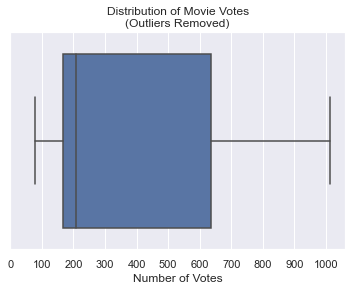

In [22]:
# outliers removed to improve quartile readability 
fig, ax = plt.subplots()
sns.boxplot(x = sorted_avg_higher_votes['numvotes'], showfliers=False, color='b');
ax.set_title('Distribution of Movie Votes\n(Outliers Removed)')
ax.set_xlabel('Number of Votes')
ax.set_xticks(range(0, 1051, 100));

In [24]:
# 15 highest-rated movie genres with more than 62 total votes
highest_rated_genres = sorted_avg_higher_votes[['genres', 'averagerating']]
highest_rated_genres['averagerating'] = highest_rated_genres['averagerating'].round(2)
highest_rated_genres

,genres,averagerating
0,"mystery,news,thriller",8.40
1,"comedy,history,musical",8.30
2,"documentary,music,war",8.30
3,"animation,documentary,mystery",8.20
4,"romance,thriller,war",8.20
5,"animation,crime,mystery",8.20
6,"comedy,musical,western",8.20
7,"documentary,fantasy,horror",8.10
8,"animation,crime,documentary",8.07
9,"documentary,drama,musical",8.05


In [25]:
# make count of each of these individual genres in dictionary
top_genres = {}
for genre in sorted_avg_higher_votes['genres'].value_counts().index:
    genre_list = genre.split(',')
    for item in genre_list:
        if item not in top_genres:
            top_genres[item] = 1
        elif item in top_genres:
            top_genres[item] += 1
top_genres = dict(sorted(top_genres.items(), key = lambda x: x[1], reverse=True))

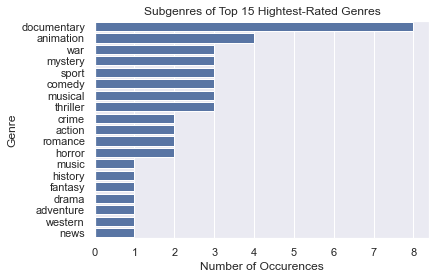

In [26]:
# bar chart showing most-used subgenres within top 15 highest-rated 
# movie genres
fig, ax = plt.subplots()
sns.barplot(x = list(top_genres.values()), y = list(top_genres.keys()), color = 'b');
ax.set_title('Subgenres of Top 15 Hightest-Rated Genres')
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Genre');

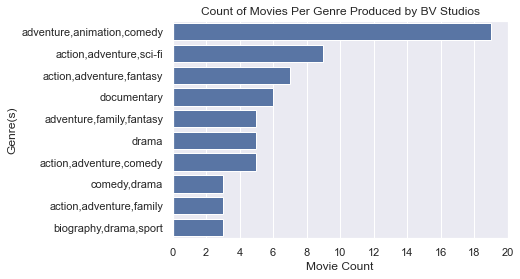

In [27]:
# dataframe with movie titles and studio
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df['title'] = movie_gross_df['title'].str.lower()

In [ ]:
# dataframe from database with movie titles and genres
movie_basics_df = pd.read_sql("""SELECT *
                                 FROM movie_basics
                                 WHERE start_year >= 2010""", conn)
movie_basics_df['primary_title'] = movie_basics_df['primary_title'].str.lower()

In [ ]:
# inner join dataframes on title (movie_gross_df), primary_title (movie_basics_df)
movie_genre_studio_df = pd.merge(movie_gross_df, movie_basics_df, 
                                 left_on='title', right_on='primary_title',
                                 how='inner')
# drop movies with no genres
movie_genre_studio_df.dropna(subset=['genres'], inplace=True)
# clean genre string for each row
movie_genre_studio_df['genres'] = movie_genre_studio_df['genres'].apply(clean_genres)

In [ ]:
# put movies from highest-performing studio into a dataframe
bv_studio_movies = movie_genre_studio_df[movie_genre_studio_df['studio'] == 'BV']

# bar chart showing number of movies per genre for BV studios
fig, ax = plt.subplots()
sns.countplot(data=bv_studio_movies, y='genres', 
              order=bv_studio_movies['genres'].value_counts().iloc[:10].index,
              color = 'b')
ax.set_xticks(range(0,21,2))
ax.set_title('Count of Movies Per Genre Produced by BV Studios')
ax.set_xlabel('Movie Count')
ax.set_ylabel('Genre(s)');

### Budget-to-Box Office Ratio

### Highest-Grossing Studios

## Statistical Communication

After identifying __animation__ as the genre Computer Vision should pursue, we wanted to explore the difference between the genre's foreign and domestic gross. 

We hypothesized that:
- A movie in the animation category will gross higher internationally than domestically. 

Based on the results of our t-test, we can determine where to allocate more marketing efforts to maximize profitability.

### T-test
We want to know if __animation__ movies gross more internationally or domestically. 
- We chose the __animation__ genre because it is one of the genres with the highest average ratings, and appears as a genre in highly-grossing films from the highest-grossing studio (BV Studios, which turns out to be Disney/Pixar).

Our __null hypothesis__ is that the animation genre grosses the same internationally and domestically.

Our __alternative__ hypothesis is that animation movies gross more internationally than domestically. 

In [1]:
# First, lets get the dataframe of only animation movies 
genre_to_grab = "Animation"

ttest_df = combined[combined['genres'].str.contains(genre_to_grab)][['domestic_gross', 'foreign_gross']]


NameError: name 'combined' is not defined

In [ ]:
# Lets check to see if we have enough samples
len(ttest_df)

159

In [ ]:
# Lets look at the statistics to give us a basis for our intution
ttest_df.describe()

,domestic_gross,foreign_gross
count,159.000000,159.000000
mean,89.131074,164.672467
std,111.552661,199.679024
min,0.000600,0.000979
25%,0.889000,9.781427
50%,48.000000,75.900000
75%,145.950000,276.900000
max,608.600000,875.700000


In [ ]:
# Lets sample from our data
domestic_sample = ttest_df['domestic_gross'].sample(100)
foreign_sample = ttest_df['foreign_gross'].sample(100)

In [ ]:
# Lets perform a one tailed two sample t test
import scipy.stats as stats
alpha = .05
tstat, pvalue = stats.ttest_ind(domestic_sample, foreign_sample, equal_var=False)

answer = 'Reject null hypothesis' if pvalue < alpha else 'Fail to reject null hypothesis'
print(answer)

Reject null hypothesis


In [ ]:
# Plot the t statistic on a t distribution
tval_alpha = stats.t.ppf(.05, 99)
x = np.linspace(-5,5,1000)
y = stats.t.pdf(x, 99)
fig, axs = plt.subplots()
axs.plot(x,y)
axs.axvline(tstat)
axs.axvline(tval_alpha)
axs.axvspan(-5, tval_alpha, alpha=0.5, color='red')
plt.text(tval_alpha + .1 ,.3,'reject region',rotation=90)
plt.text(tstat + .1 ,.3,'t statistic',rotation=90)
axs.set_title('T-Distribution w/D.F = 99')

The results of our statistical test show that with 95% confidence we can conclude foreign gross is significantly greater than domestic gross regarding movies with the __animation__ genre. 
- This indicates that more money should be spent marketing to foreign markets as opposed to domestic.

## Conclusion
### Recommendations
### Next Steps
(Emphasize three recommendations here )